In [1]:
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

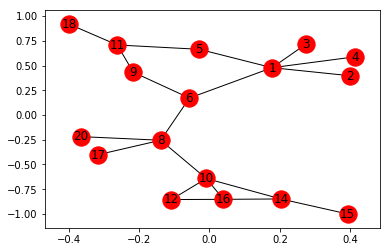

In [2]:
# Example
g = nx.Graph()
g.add_nodes_from([1,2,3,4,5,6])
g.add_edges_from([(1,2),(1,3),(1,4),(1,5),(1,6),(5,11),(6,8),(6,9),(8,10),(8,17),(8,20),(9,11),(10,12),(10,16),(11,18),(12,16),(10,14),(14,15),(14,16)])
posizione = nx.spring_layout(g)
nx.draw_networkx(g,pos=posizione)

# Degree and Degree centrality


## The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G.

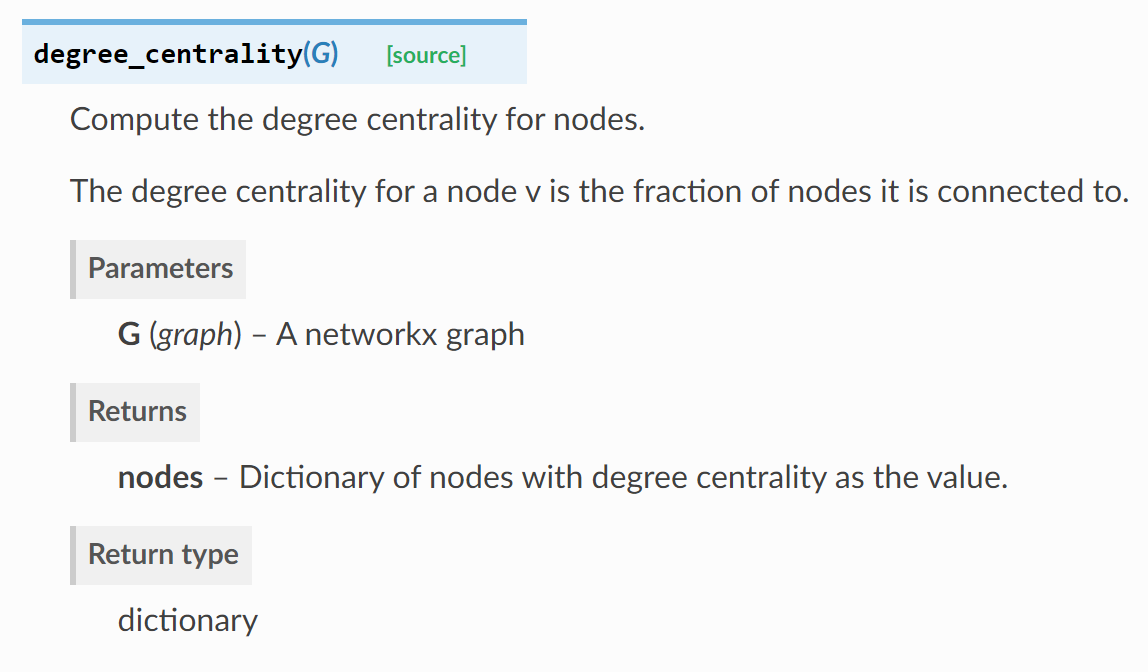

In [3]:
degree=dict(nx.degree(g))
degree_centrality = nx.degree_centrality(g)
print(degree)
print(degree_centrality)

{1: 5, 2: 1, 3: 1, 4: 1, 5: 2, 6: 3, 11: 3, 8: 4, 9: 2, 10: 4, 17: 1, 20: 1, 12: 2, 16: 3, 18: 1, 14: 3, 15: 1}
{1: 0.3125, 2: 0.0625, 3: 0.0625, 4: 0.0625, 5: 0.125, 6: 0.1875, 11: 0.1875, 8: 0.25, 9: 0.125, 10: 0.25, 17: 0.0625, 20: 0.0625, 12: 0.125, 16: 0.1875, 18: 0.0625, 14: 0.1875, 15: 0.0625}


#  Betweenness centrality

## betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)

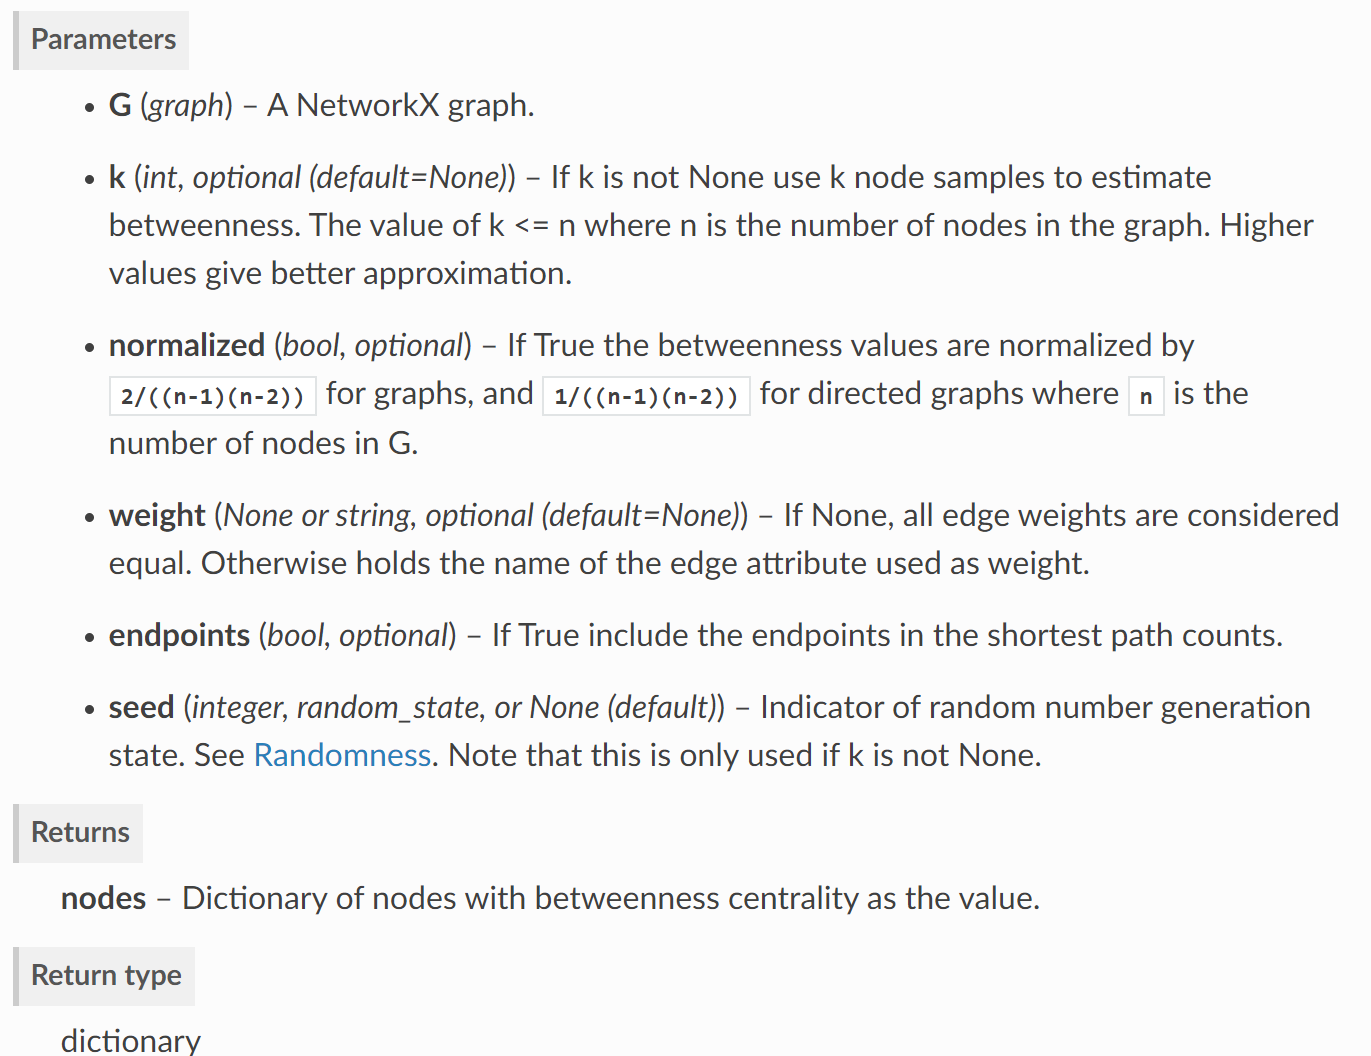

In [4]:
betweenness_centrality=nx.betweenness_centrality(g)
print(betweenness_centrality)

{1: 0.425, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.06666666666666667, 6: 0.5666666666666667, 11: 0.13333333333333333, 8: 0.6166666666666667, 9: 0.15, 10: 0.4083333333333333, 17: 0.0, 20: 0.0, 12: 0.0, 16: 0.008333333333333333, 18: 0.0, 14: 0.125, 15: 0.0}


# Closeness centrality

## closeness_centrality(G, u=None, distance=None, wf_improved=True)

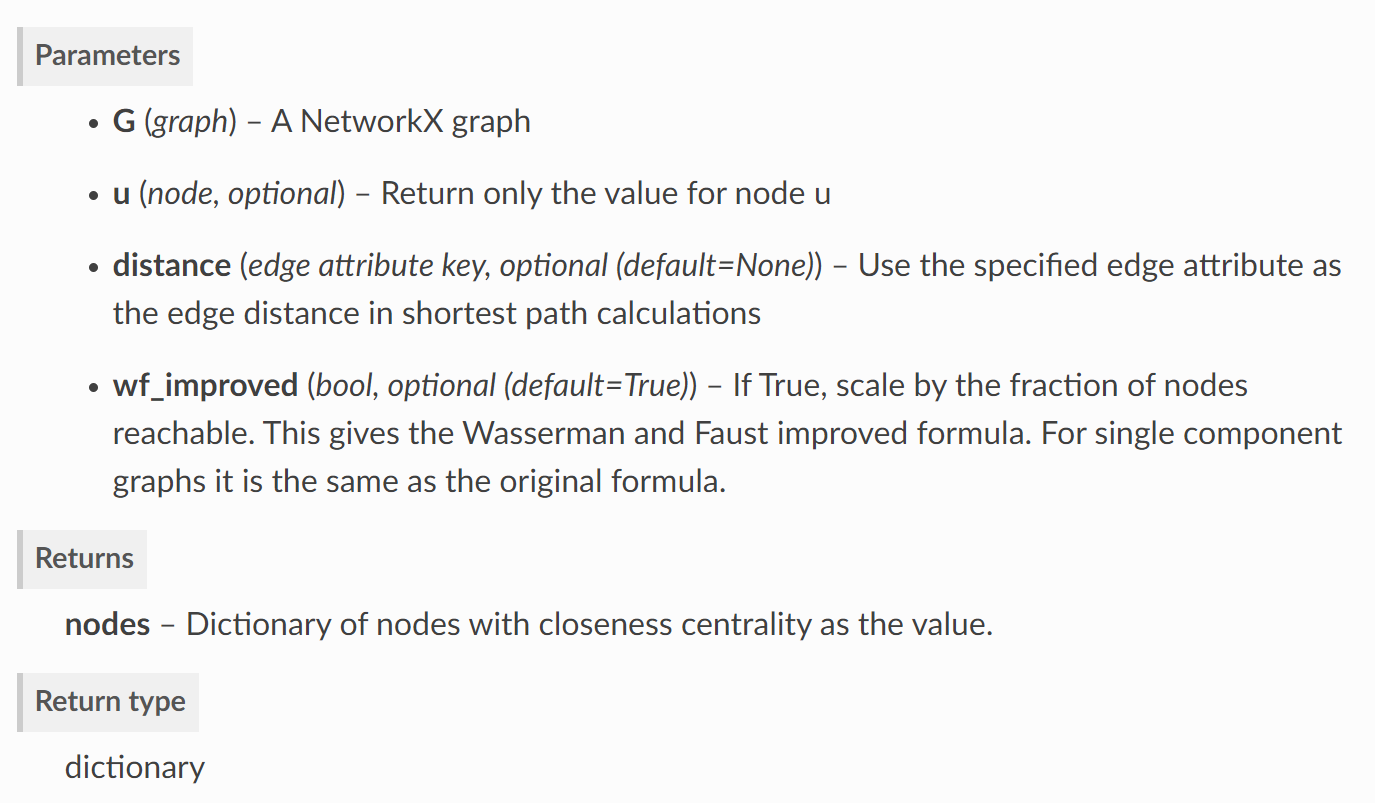

In [5]:
closeness_centrality = nx.closeness_centrality(g)
print(closeness_centrality)

{1: 0.4, 2: 0.2909090909090909, 3: 0.2909090909090909, 4: 0.2909090909090909, 5: 0.32, 6: 0.45714285714285713, 11: 0.3076923076923077, 8: 0.4444444444444444, 9: 0.35555555555555557, 10: 0.37209302325581395, 17: 0.3137254901960784, 20: 0.3137254901960784, 12: 0.2807017543859649, 16: 0.2909090909090909, 18: 0.23880597014925373, 14: 0.2909090909090909, 15: 0.22857142857142856}


# Eigenvector centrality

## eigenvector_centrality(G, max_iter=100, tol=1e-06, nstart=None, weight=None)

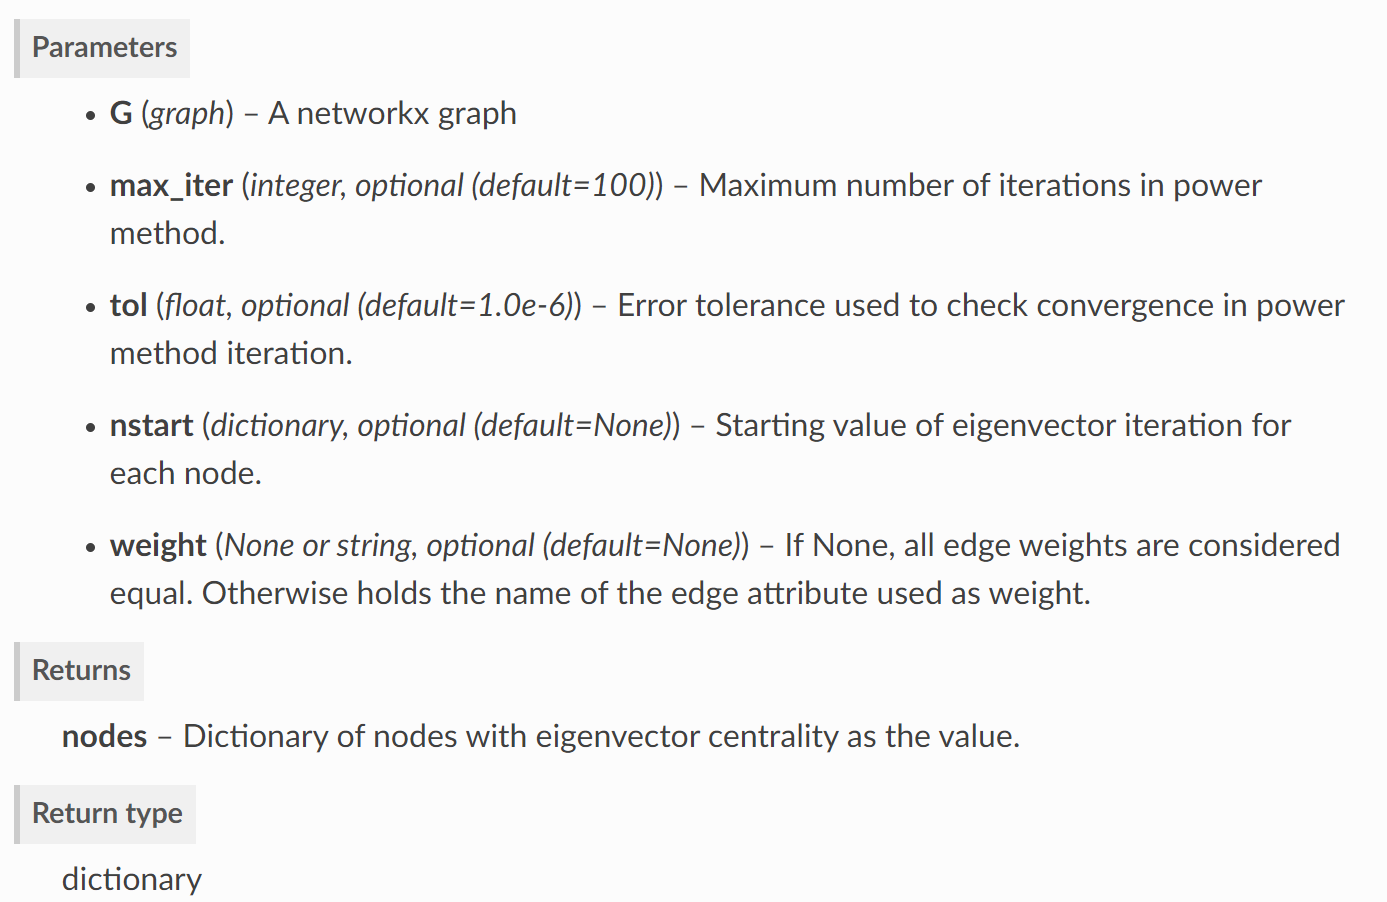

In [6]:
eigenvector_centrality = nx.eigenvector_centrality(g)
print(eigenvector_centrality)

{1: 0.16384517439795557, 2: 0.05739135203156839, 3: 0.05739135203156839, 4: 0.05739135203156839, 5: 0.08299320202902649, 6: 0.21259157688265912, 11: 0.07308983874471645, 8: 0.3430169455057569, 9: 0.10006725322986021, 10: 0.5263996554708305, 17: 0.12014902653754009, 20: 0.12014902653754009, 12: 0.33759632313519145, 16: 0.4374182699888777, 18: 0.025601849997458105, 14: 0.3848079306745758, 15: 0.13478653209328878}


degree:       (1, 0.3125)
betweenness:  (8, 0.6166666666666667)
closeness:    (6, 0.45714285714285713)
eigenvector:  (10, 0.5263996554708305)


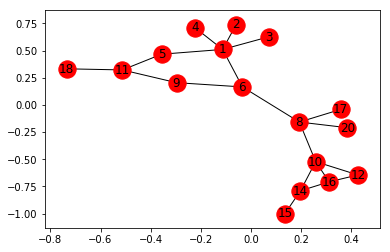

In [7]:
# Comparison

posizione = nx.spring_layout(g)
nx.draw_networkx(g,pos=posizione)
degree_centrality = nx.degree_centrality(g)
betweenness_centrality = nx.betweenness_centrality(g)
closeness_centrality = nx.closeness_centrality(g)
eigenvector_centrality = nx.eigenvector_centrality(g)

# lambda function or anonimous function. no name, no return, no def, just use the keyword lambda
# Sintax: lambda argument: manipulate(argument)
hub_degree = sorted(degree_centrality.items(),key = lambda x:x[1], reverse=True)[0]
hub_betweenness = sorted(betweenness_centrality.items(),key = lambda x:x[1], reverse=True)[0]
hub_closeness = sorted(closeness_centrality.items(),key = lambda x:x[1], reverse=True)[0]
hub_eigenvector = sorted(eigenvector_centrality.items(),key = lambda x:x[1], reverse=True)[0]
print('degree:      ',hub_degree)
print('betweenness: ',hub_betweenness)
print('closeness:   ',hub_closeness)
print('eigenvector: ',hub_eigenvector)

# Correlation

## scipy.stats.pearsonr(x,y)
Pearson correlation coefficient and p-value for testing non-correlation.
The Pearson correlation coefficient measures the linear relationship between two datasets
It varies between -1 and +1 with 0 implying no correlation

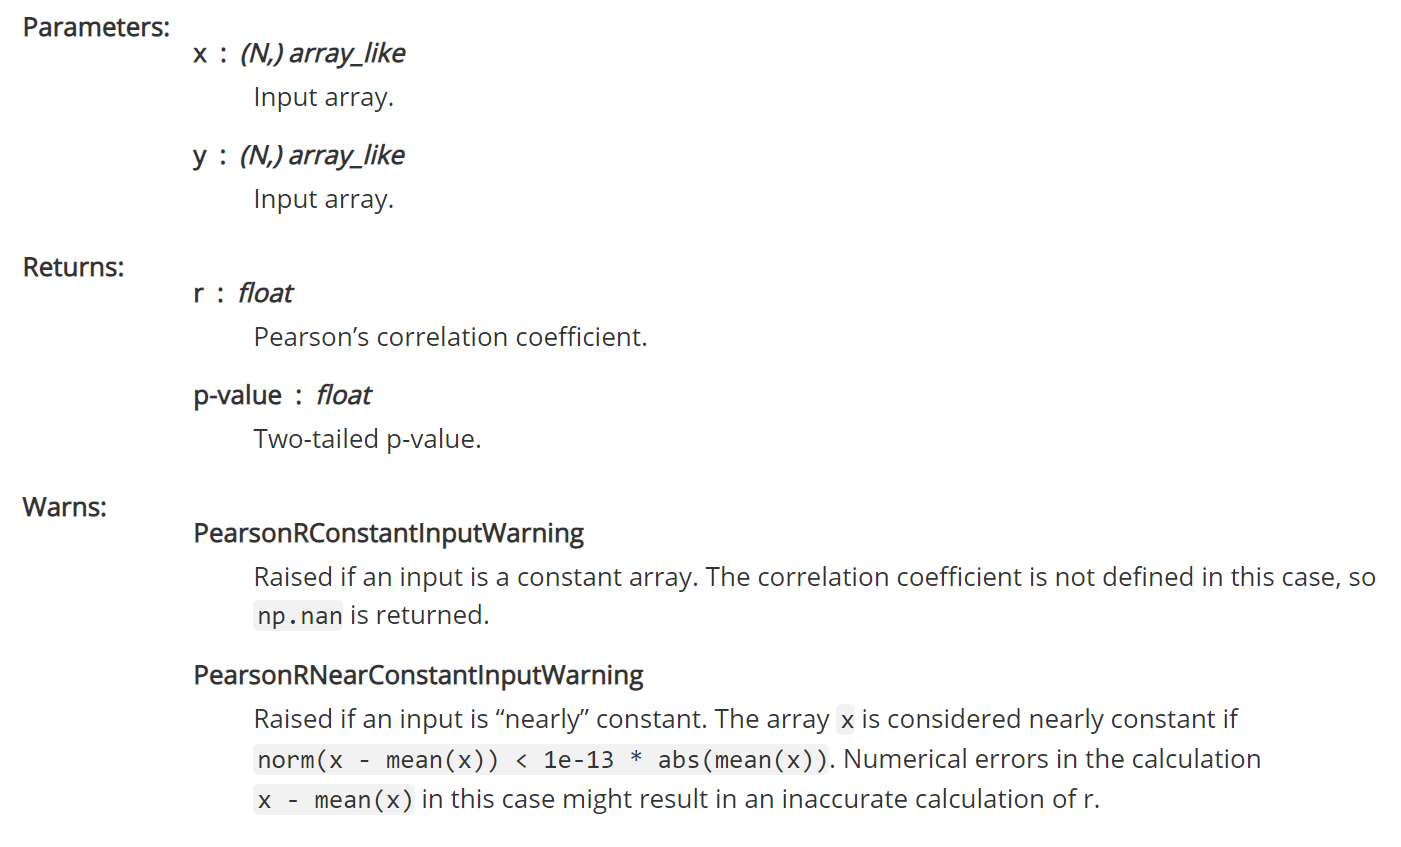

In [8]:
print(scipy.stats.pearsonr(list(degree_centrality.values()),list(eigenvector_centrality.values())))
print(scipy.stats.pearsonr(list(betweenness_centrality.values()),list(closeness_centrality.values())))

(0.6213737463957603, 0.0077555528289388964)
(0.919424509069455, 1.8150226200352663e-07)


In [9]:
# Rank correlation: Spearman and Kendall coefficient
print(scipy.stats.spearmanr(list(degree_centrality.values()),list(eigenvector_centrality.values())))
print(scipy.stats.kendalltau(list(degree_centrality.values()),list(eigenvector_centrality.values())))

SpearmanrResult(correlation=0.7011451573315972, pvalue=0.0017132371433697085)
KendalltauResult(correlation=0.5351295510095069, pvalue=0.0061094166791304735)


# Karate graph

('34', 0.5151515151515151)
('1', 0.48484848484848486)


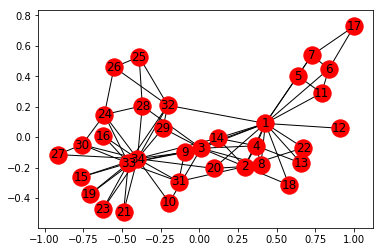

In [10]:
karate_graph=nx.Graph()
with open('data/karate.mtx') as f:
    f.readline()
    f.readline()
    for line in f:
        source, destination = line.strip().split(' ') #tuple
        karate_graph.add_edge(source,destination)
posizione = nx.spring_layout(karate_graph)
nx.draw_networkx(karate_graph,pos=posizione)
degree_centrality = nx.degree_centrality(karate_graph)
print(sorted(degree_centrality.items(),key= lambda x:x[1], reverse=True)[0])
print(sorted(degree_centrality.items(),key= lambda x:x[1], reverse=True)[1])

# Directed graph

1899
20296


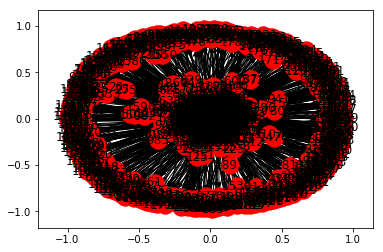

In [11]:
ucirvine_graph = nx.DiGraph()
with open('data/out.opsahl-ucsocial') as f:
    f.readline()
    f.readline()
    for line in f:
        a,b,_,_ =line.strip().split() #['id1','id2','1','timestamp']
        ucirvine_graph.add_edge(a,b)
print(ucirvine_graph.order())
print(ucirvine_graph.size())
posizione = nx.spring_layout(ucirvine_graph)
nx.draw_networkx(ucirvine_graph,pos=posizione)

In [12]:
in_degree_centrality = dict(ucirvine_graph.in_degree())
out_degree_centrality = dict(ucirvine_graph.out_degree())
pr_centrality = dict(nx.pagerank_scipy(ucirvine_graph))

In [13]:
hub_in_degree = sorted(in_degree_centrality.items(),key= lambda x:x[1], reverse=True)[0]
hub_out_degree = sorted(out_degree_centrality.items(),key= lambda x:x[1], reverse=True)[0]
hub_pagerank = sorted(pr_centrality.items(),key= lambda x:x[1], reverse=True)[0]

print('in_degree:  ',hub_in_degree)
print('out_degree: ',hub_out_degree)
print('pagerank:   ',hub_pagerank)

in_degree:   ('32', 137)
out_degree:  ('9', 237)
pagerank:    ('32', 0.005997514282124588)


In [14]:
print(scipy.stats.pearsonr(list(in_degree_centrality.values()),list(out_degree_centrality.values())))
print(scipy.stats.pearsonr(list(in_degree_centrality.values()),list(pr_centrality.values())))
print(scipy.stats.pearsonr(list(out_degree_centrality.values()),list(pr_centrality.values())))

(0.8311220652951532, 0.0)
(0.9790626532378542, 0.0)
(0.8313267773349414, 0.0)


Text(0,0.5,'Out_degree')

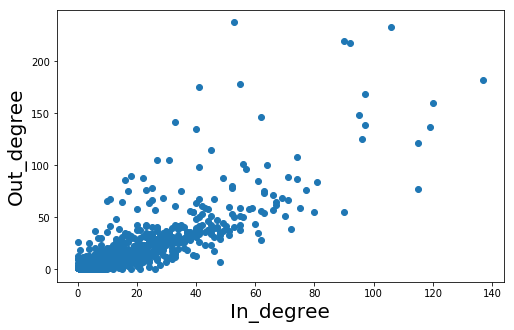

In [15]:
fig = plt.figure(figsize=(8,5)) 
axes = fig.gca()
plt.scatter(list(in_degree_centrality.values()),list(out_degree_centrality.values()))
axes.set_xlabel('In_degree',size = 20)
axes.set_ylabel('Out_degree',size = 20)